In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from os.path import join
from os import environ

In [2]:
Autoencoder = tf.keras.models.load_model('k_fold_best_model_new_architecture_test3')

In [3]:
home=environ['HOME']
folder1='GRIMech_CH4_models_RS3_15_trajectories'
folder2='Datasets'

cantera_species=pd.read_csv(join(home, folder1,folder2,'State_space_cte_pressure_T1418_st-quarter_phi_13.csv'))
cantera_species=pd.DataFrame(cantera_species)

cantera_sources=pd.read_csv(join(home,folder1,folder2,'Reaction_rates_cte_pressure_T1418_st-quarter_phi_13.csv'))
cantera_sources=pd.DataFrame(cantera_sources)

maximum_values=pd.read_csv(join(home,folder1,folder2,'maximum_values_T1418.csv'))
maximum_values=pd.DataFrame(maximum_values)

In [4]:
def hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values):
    cantera_sources=cantera_sources.add_suffix('w')
    cantera_sources=cantera_sources.iloc[:,1:] #for taking out the timestep as data 
    
    cantera_time=cantera_species.iloc[:,1]
    cantera_temperature=cantera_species.iloc[:,2]
    cantera_pressure=cantera_species.iloc[:,3]
    
    cantera_species_fractions=cantera_species.iloc[:,4:]
    print(np.shape(cantera_species_fractions))
    
    cantera_species_fractions=cantera_species_fractions.loc[:,(cantera_species!=0).any(axis=0)]
    cantera_species_fractions=cantera_species_fractions.loc[:, (cantera_species != cantera_species.iloc[0]).any()]
    print(np.shape(cantera_species_fractions))
    
    n_columns_mass_fraction=np.shape(cantera_species_fractions)[1]
    print(n_columns_mass_fraction)
    
    cantera_sources=cantera_sources.loc[:,(cantera_sources!=0).any(axis=0)]
    cantera_sources=cantera_sources.loc[:, (cantera_sources != cantera_sources.iloc[0]).any()]
    
    print(np.shape(cantera_sources))
    n_columns_source=np.shape(cantera_sources)[1]
    print(n_columns_source)
    
    cantera_data=pd.concat([cantera_time, cantera_temperature,cantera_species_fractions,cantera_sources],axis=1)

    maximum_values=maximum_values.iloc[:,1:]
    maximum_values=pd.concat([maximum_values.iloc[:,0:2],maximum_values.iloc[:,3:]],axis=1)
    #print(maximum_values)
    
    maximum_values=maximum_values.to_numpy()
    #print(np.shape(maximum_values))
    
    iterations=np.shape(cantera_data)[1]
    
    #cantera_data.divide(maximum_values)
    for j in range(iterations):
        cantera_data.iloc[:,j]=cantera_data.iloc[:,j]/(maximum_values[0,j])
        #print(maximum_values[0,j])
    
    cantera_data_shift=cantera_data.loc[1:,:]
    cantera_data_shift=cantera_data_shift.add_suffix('shift')
    
    cantera_data=cantera_data.reset_index()
    cantera_data_shift=cantera_data_shift.reset_index()
    
    cantera_data=cantera_data.iloc[:,1:]
    cantera_data_shift=cantera_data_shift.iloc[:,1:]

    cantera_data=cantera_data.iloc[0:(np.shape(cantera_data_shift)[0]),:]
    
    data_all=pd.concat([cantera_data, cantera_data_shift], axis=1)

    columns=data_all.columns.to_list()
    
    return data_all, n_columns_source, n_columns_mass_fraction, columns

In [5]:
dataset, n_columns_source, n_columns_mass_fraction, columns=hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values)

(120000, 49)
(120000, 30)
30
(120000, 30)
30


In [6]:
dataset

,t[s],T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,...,CH3OHwshift,C2Hwshift,C2H2wshift,C2H3wshift,C2H4wshift,C2H5wshift,C2H6wshift,HCCOwshift,CH2COwshift,HCCOHwshift
0,0.000008,0.405009,4.729498e-11,1.971640e-09,4.219003e-11,0.772934,2.368117e-11,4.290795e-13,0.000001,1.943950e-09,...,4.181045e-09,1.298451e-27,1.099943e-16,2.076509e-17,3.516825e-08,1.581647e-05,-1.104090e-03,7.953392e-27,4.987783e-27,3.224891e-28
1,0.000017,0.405009,1.825608e-10,3.732919e-09,1.576041e-10,0.772934,9.049289e-11,3.195035e-12,0.000003,7.772172e-09,...,9.113030e-09,6.641953e-27,2.504898e-16,6.392292e-17,5.369914e-08,1.635066e-05,-1.104442e-03,5.593832e-26,3.562864e-26,2.343095e-27
2,0.000025,0.405009,3.964625e-10,5.307104e-09,3.311332e-10,0.772934,1.942930e-10,1.034751e-11,0.000004,1.748179e-08,...,1.569892e-08,2.114255e-26,4.506316e-16,1.413789e-16,7.283510e-08,1.686674e-05,-1.104789e-03,2.197366e-25,1.449236e-25,9.487542e-27
3,0.000033,0.405009,6.806102e-10,6.715129e-09,5.500026e-10,0.772934,3.294066e-10,2.365342e-11,0.000005,3.106941e-08,...,2.378075e-08,5.118805e-26,7.123190e-16,2.603177e-16,9.255465e-08,1.736363e-05,-1.105132e-03,6.261416e-25,4.308440e-25,2.783656e-26
4,0.000042,0.405009,1.027605e-09,7.975493e-09,8.036873e-10,0.772934,4.907315e-10,4.458900e-11,0.000007,4.853164e-08,...,3.321613e-08,1.040193e-25,1.037384e-15,4.265531e-16,1.128352e-07,1.784058e-05,-1.105470e-03,1.456144e-24,1.047985e-24,6.659878e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.999958,0.928925,2.085782e+00,1.148611e+00,1.416397e-01,0.006871,4.091438e-01,9.652110e-01,0.003740,7.043731e-03,...,-8.639213e-20,-2.658728e-21,-1.867111e-21,-4.075219e-24,-2.976650e-25,-2.898866e-27,-4.845588e-29,-2.892582e-20,-1.718682e-20,-1.157284e-21
119995,0.999967,0.928925,2.085782e+00,1.148611e+00,1.416397e-01,0.006871,4.091438e-01,9.652110e-01,0.003740,7.043731e-03,...,-8.022323e-20,-3.149905e-21,-1.845286e-21,-4.085502e-24,-2.953571e-25,-2.791919e-27,-4.958784e-29,-2.989079e-20,-1.716243e-20,-1.127981e-21
119996,0.999975,0.928925,2.085782e+00,1.148611e+00,1.416397e-01,0.006871,4.091438e-01,9.652110e-01,0.003740,7.043731e-03,...,-7.586148e-20,-2.900652e-21,-1.861210e-21,-4.082213e-24,-2.981807e-25,-2.868460e-27,-4.821552e-29,-2.907992e-20,-1.718305e-20,-1.105191e-21
119997,0.999983,0.928925,2.085782e+00,1.148611e+00,1.416397e-01,0.006871,4.091438e-01,9.652110e-01,0.003740,7.043731e-03,...,-8.091400e-20,-2.932651e-21,-1.859894e-21,-4.080920e-24,-2.962308e-25,-2.864867e-27,-4.967641e-29,-2.951700e-20,-1.711440e-20,-1.079514e-21


In [7]:
results=Autoencoder.decoder(Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy()))).numpy()

In [8]:
interest_vector=['T[K]','CH3', 'CH4', 'H2O','O2','H2','OH','HO2','H2O2']

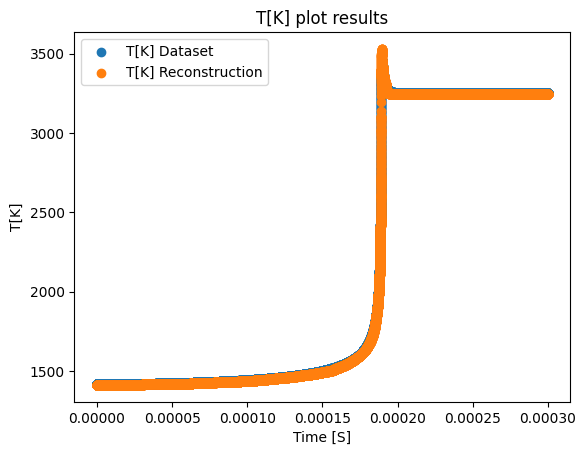

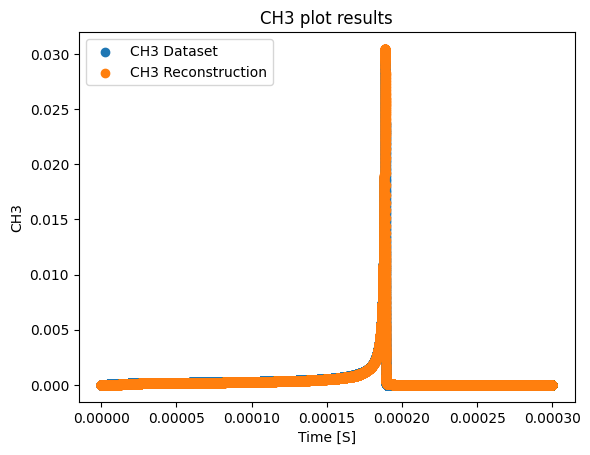

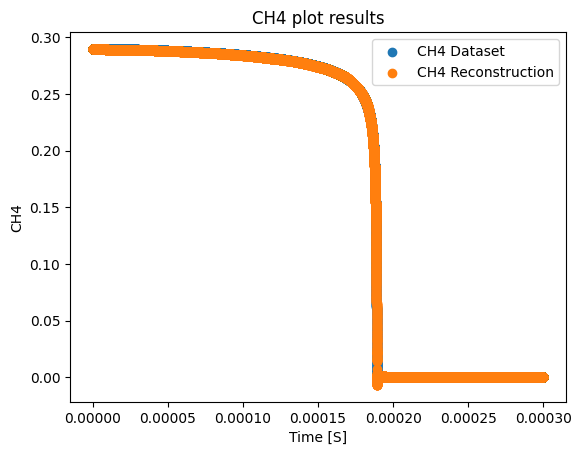

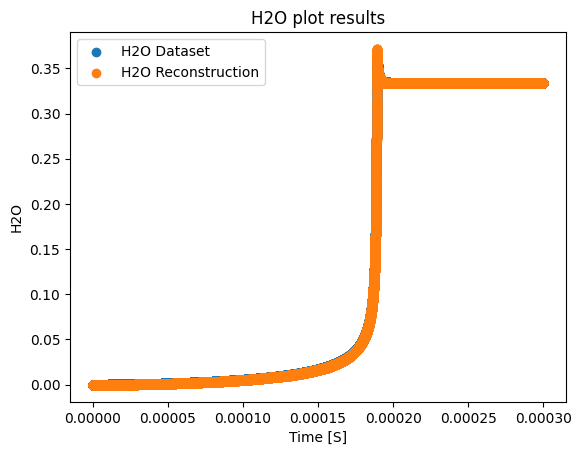

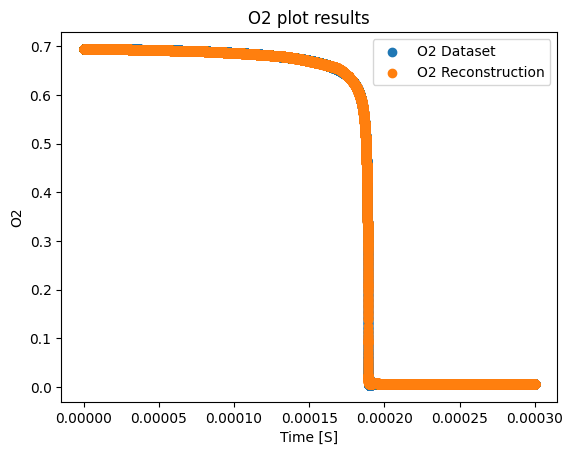

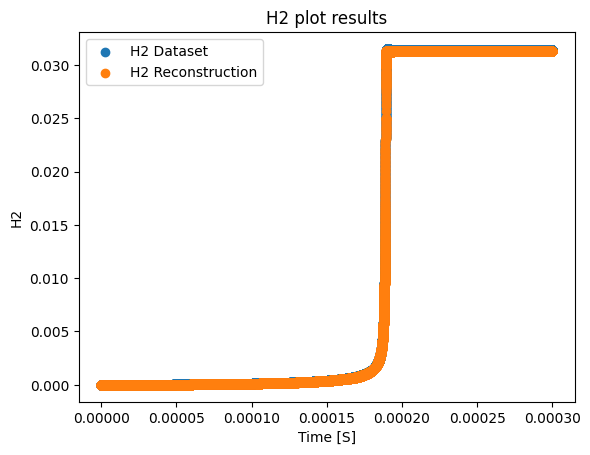

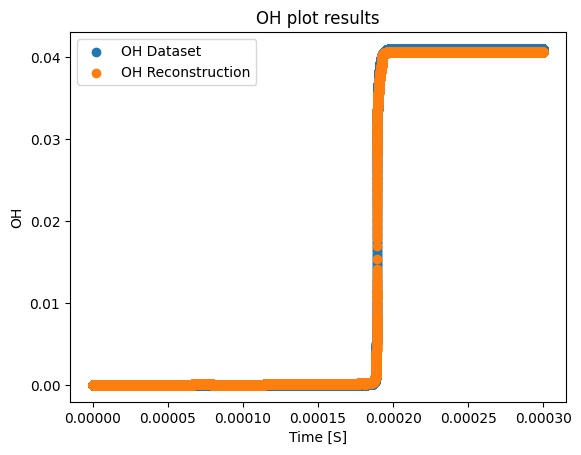

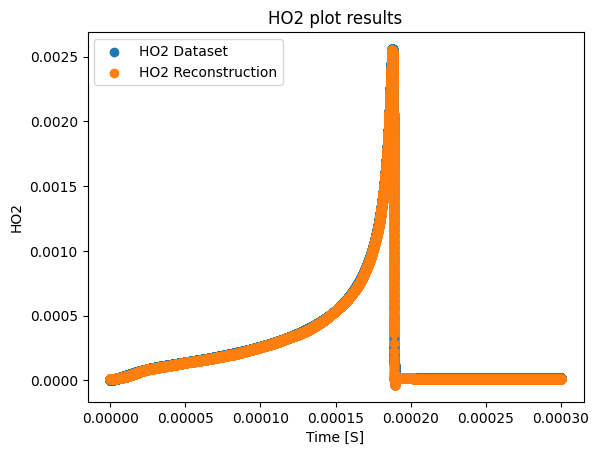

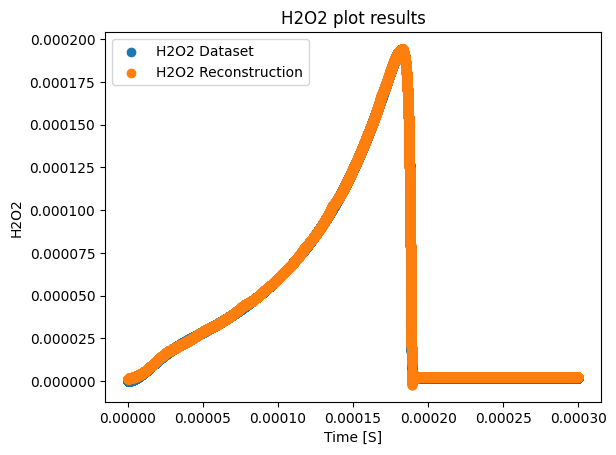

In [9]:
t_index=columns.index('t[s]shift')
t_trans=maximum_values.columns.get_loc('t[s]')
time_plot=(dataset.iloc[:,t_index])*maximum_values.iloc[0,t_trans]
    
for k in range(len(interest_vector)):
    original_index=columns.index(interest_vector[k]+'shift')
    #print(columns[original_index])
    results_index=columns.index(interest_vector[k]) #minues one due to the time column presence 
    #print(columns[results_index])
    #print(results_index-1)
    transformation_index=maximum_values.columns.get_loc(interest_vector[k])
    plot_name=interest_vector[k]+'.png'
    
    input_label=interest_vector[k]+' Dataset'
    output_label=interest_vector[k]+' Reconstruction'
    
    original=(dataset.iloc[:,original_index]).to_numpy()
    #original=original*transformation_values[1,original_index]
    #original=original+transformation_values[0,original_index]
    #original=np.exp(original)-1
    original=original*maximum_values.iloc[0,transformation_index]
    
    output=(results[:,results_index-1])
    #output=output*transformation_values[1,results_index]
    #output=output+transformation_values[0,results_index]
    #output=np.exp(output)-1
    output=output*maximum_values.iloc[0,transformation_index]
    
    plt.figure(k)
    plt.scatter(time_plot,original, label=input_label)
    plt.scatter(time_plot,output, label=output_label)
    plt.title(interest_vector[k]+' plot results')
    plt.xlabel('Time [S]')
    plt.ylabel(interest_vector[k])
    plt.legend()

In [10]:
latent_space=Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy())).numpy()

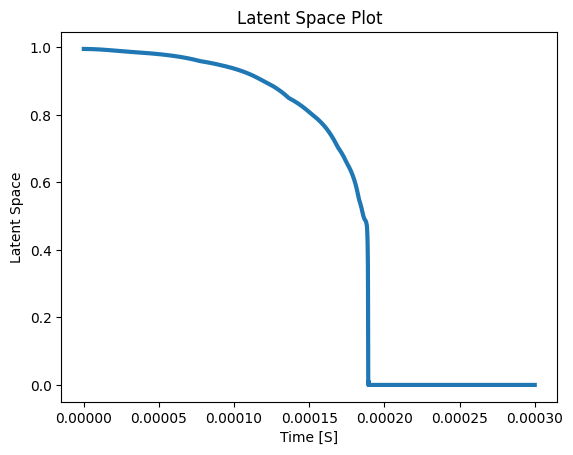

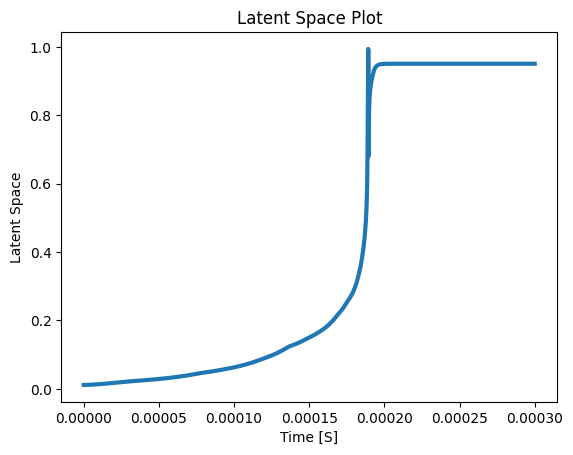

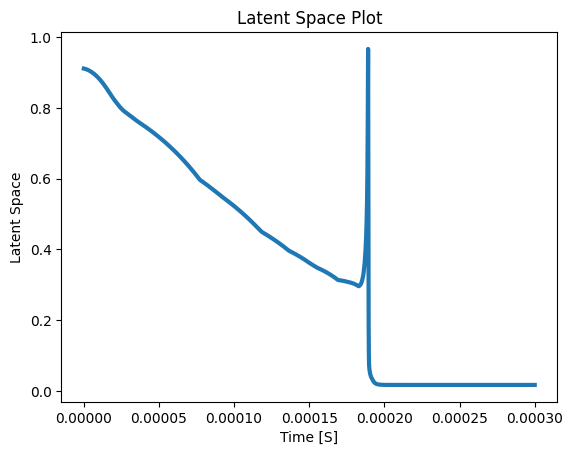

In [11]:
reduced_size=3

if reduced_size==1:
    plt.figure()
    plt.plot(time_plot,latent_space,linewidth=3)
    plt.title('Latent Space Plot')
    plt.xlabel('Time [S]')
    plt.ylabel('Latent Space')
else: 
    for i in range(reduced_size):
            plt.figure(i)
            plt.plot(time_plot,latent_space[:,i],linewidth=3)
            plt.title('Latent Space Plot')
            plt.xlabel('Time [S]')
            plt.ylabel('Latent Space')

In [12]:
corr_dataset=dataset.iloc[:,1:2+n_columns_mass_fraction+n_columns_source]
corr_columns=corr_dataset.columns.to_list()
corr_dataset

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.405009,4.729498e-11,1.971640e-09,4.219003e-11,0.772934,2.368117e-11,4.290795e-13,0.000001,1.943950e-09,8.386159e-35,...,1.079079e-09,7.833399e-29,2.717196e-17,3.068731e-18,1.726252e-08,1.526567e-05,-1.103735e-03,2.767561e-28,1.879016e-28,1.087167e-29
1,0.405009,1.825608e-10,3.732919e-09,1.576041e-10,0.772934,9.049289e-11,3.195035e-12,0.000003,7.772172e-09,4.002598e-33,...,4.181045e-09,1.298451e-27,1.099943e-16,2.076509e-17,3.516825e-08,1.581647e-05,-1.104090e-03,7.953392e-27,4.987783e-27,3.224891e-28
2,0.405009,3.964625e-10,5.307104e-09,3.311332e-10,0.772934,1.942930e-10,1.034751e-11,0.000004,1.748179e-08,3.372477e-32,...,9.113030e-09,6.641953e-27,2.504898e-16,6.392292e-17,5.369914e-08,1.635066e-05,-1.104442e-03,5.593832e-26,3.562864e-26,2.343095e-27
3,0.405009,6.806102e-10,6.715129e-09,5.500026e-10,0.772934,3.294066e-10,2.365342e-11,0.000005,3.106941e-08,1.387988e-31,...,1.569892e-08,2.114255e-26,4.506316e-16,1.413789e-16,7.283510e-08,1.686674e-05,-1.104789e-03,2.197366e-25,1.449236e-25,9.487542e-27
4,0.405009,1.027605e-09,7.975493e-09,8.036873e-10,0.772934,4.907315e-10,4.458900e-11,0.000007,4.853164e-08,3.944618e-31,...,2.378075e-08,5.118805e-26,7.123190e-16,2.603177e-16,9.255465e-08,1.736363e-05,-1.105132e-03,6.261416e-25,4.308440e-25,2.783656e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.928925,2.085782e+00,1.148611e+00,1.416397e-01,0.006871,4.091438e-01,9.652110e-01,0.003740,7.043731e-03,3.234875e-06,...,-6.883689e-20,-2.630552e-21,-1.871893e-21,-4.082058e-24,-2.944235e-25,-2.792410e-27,-5.211608e-29,-2.899045e-20,-1.719971e-20,-1.025827e-21
119995,0.928925,2.085782e+00,1.148611e+00,1.416397e-01,0.006871,4.091438e-01,9.652110e-01,0.003740,7.043731e-03,3.234875e-06,...,-8.639213e-20,-2.658728e-21,-1.867111e-21,-4.075219e-24,-2.976650e-25,-2.898866e-27,-4.845588e-29,-2.892582e-20,-1.718682e-20,-1.157284e-21
119996,0.928925,2.085782e+00,1.148611e+00,1.416397e-01,0.006871,4.091438e-01,9.652110e-01,0.003740,7.043731e-03,3.234875e-06,...,-8.022323e-20,-3.149905e-21,-1.845286e-21,-4.085502e-24,-2.953571e-25,-2.791919e-27,-4.958784e-29,-2.989079e-20,-1.716243e-20,-1.127981e-21
119997,0.928925,2.085782e+00,1.148611e+00,1.416397e-01,0.006871,4.091438e-01,9.652110e-01,0.003740,7.043731e-03,3.234875e-06,...,-7.586148e-20,-2.900652e-21,-1.861210e-21,-4.082213e-24,-2.981807e-25,-2.868460e-27,-4.821552e-29,-2.907992e-20,-1.718305e-20,-1.105191e-21


In [13]:
iterations=np.shape(corr_dataset)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes=np.zeros(iterations) #rows, columns
    corr_indexes=np.array([corr_indexes])
    
    for j in range(iterations):
        corr_indexes[:,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space)
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)
else: 
    
    corr_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes[k,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space[:,k])
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)

In [14]:
corr_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,-0.828601,-0.835493,-0.962318,-0.962317,0.834568,-0.962317,-0.831963,-0.017416,-0.014411,-0.826019,...,0.015112,0.004153,0.006453,0.006559,0.009909,0.127225,-0.059857,0.005119,0.005776,0.007349
1,0.834393,0.840339,0.959134,0.959133,-0.839412,0.959133,0.839005,0.014422,0.010906,0.833075,...,-0.020416,-0.008420,-0.011725,-0.011840,-0.015202,-0.132772,0.054716,-0.010115,-0.011044,-0.012349
2,-0.821920,-0.828826,-0.947687,-0.947687,0.827900,-0.947686,-0.825281,-0.003989,-0.018638,-0.819323,...,0.009958,0.019065,0.019073,0.018151,0.012128,0.136491,-0.067853,0.018832,0.018572,0.021066


CH4      0.962317
O2       0.834568
C2H6     0.306787
HO2w     0.261160
H2O2w    0.257718
Name: 0, dtype: float64
H      0.959134
CO2    0.959133
O      0.959133
OH     0.959133
H2     0.840339
Name: 1, dtype: float64
CH4      0.947686
O2       0.827900
C2H6     0.290749
HO2w     0.253922
H2O2w    0.244376
Name: 2, dtype: float64


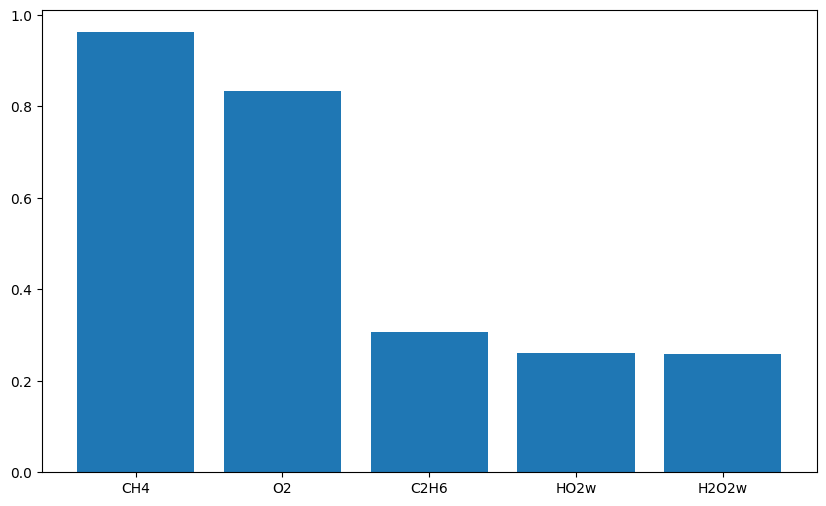

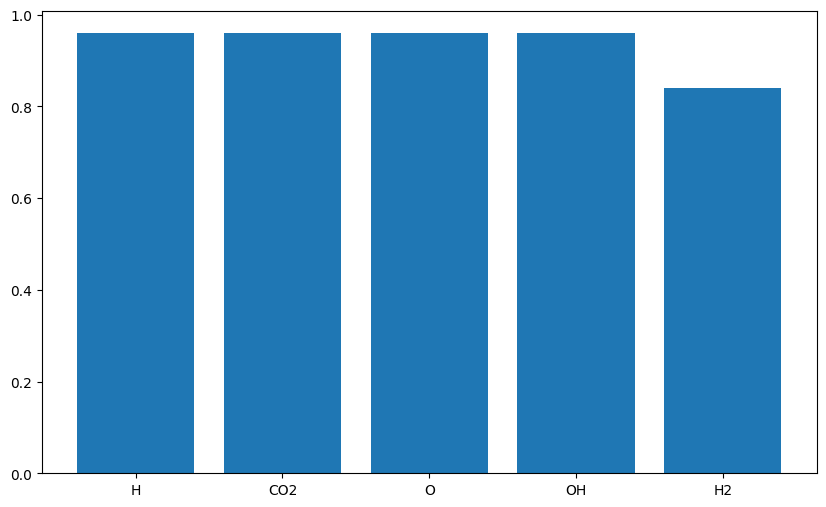

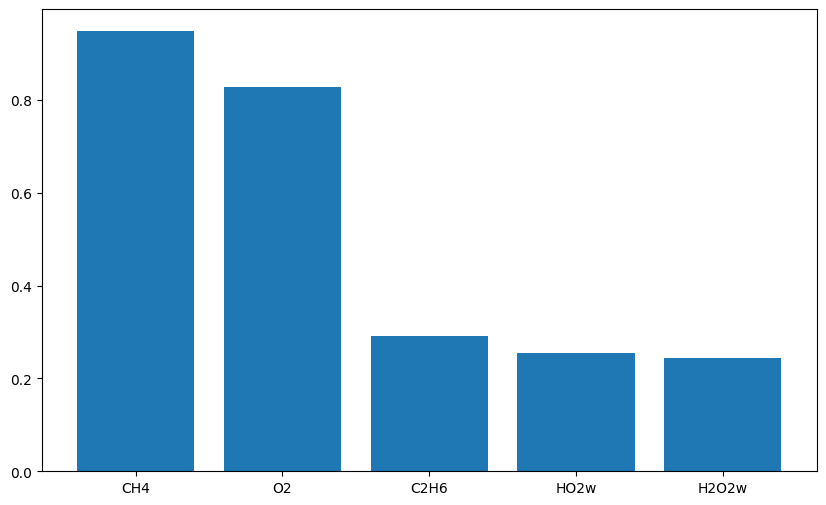

In [15]:
for m in range(reduced_size):
    
    indexes=corr_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [16]:
if reduced_size==1:
    spearman_indexes=np.zeros(iterations) #rows, columns
    spearman_indexes=np.array([spearman_indexes])
    
    for j in range(iterations):
        spearman_indexes[:,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space)
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)
else: 
    
    spearman_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            spearman_indexes[k,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space[:,k])
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)

In [17]:
spearman_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,-0.928509,-0.930279,-0.989914,-0.989914,0.929793,-0.989914,-0.928393,0.360893,0.354930,-0.925122,...,0.434079,0.417554,0.422620,0.422892,0.427542,0.469678,0.118040,0.419745,0.421198,0.420808
1,0.930878,0.932135,0.988487,0.988487,-0.931647,0.988487,0.931432,-0.361619,-0.356548,0.928189,...,-0.436723,-0.418735,-0.425228,-0.425511,-0.430176,-0.472346,-0.120868,-0.421968,-0.423807,-0.423030
2,-0.924503,-0.927007,-0.983346,-0.983346,0.926522,-0.983346,-0.923241,0.366029,0.351077,-0.913620,...,0.412050,0.422736,0.424438,0.423209,0.414591,0.466613,0.101177,0.423166,0.423276,0.424227


CH4      0.989914
O2       0.929793
C2H6     0.579394
H2O2w    0.550111
HO2w     0.539019
Name: 0, dtype: float64
H      0.988487
CO2    0.988487
O      0.988487
OH     0.988487
H2     0.932135
Name: 1, dtype: float64
CH4      0.983346
O2       0.926522
C2H6     0.563573
CH3w     0.525287
H2O2w    0.522672
Name: 2, dtype: float64


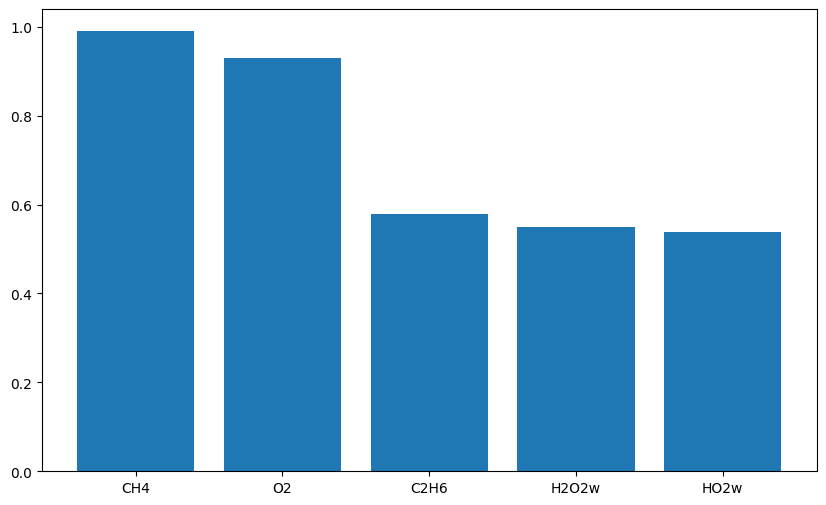

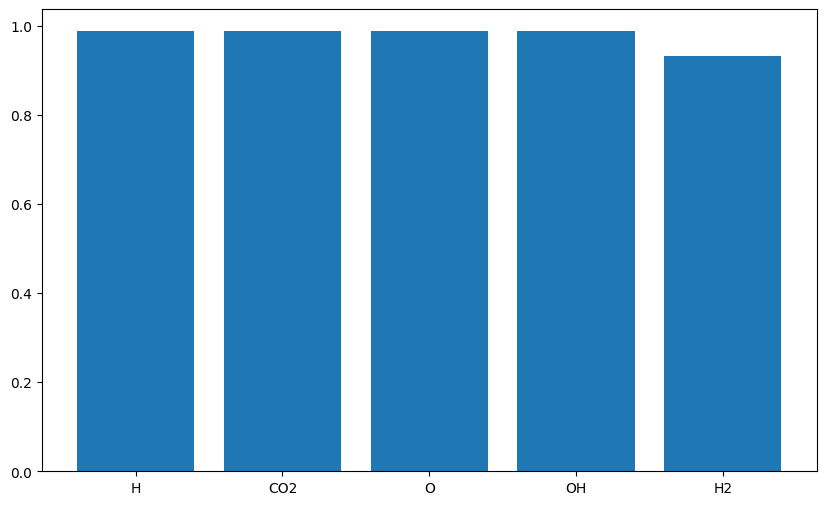

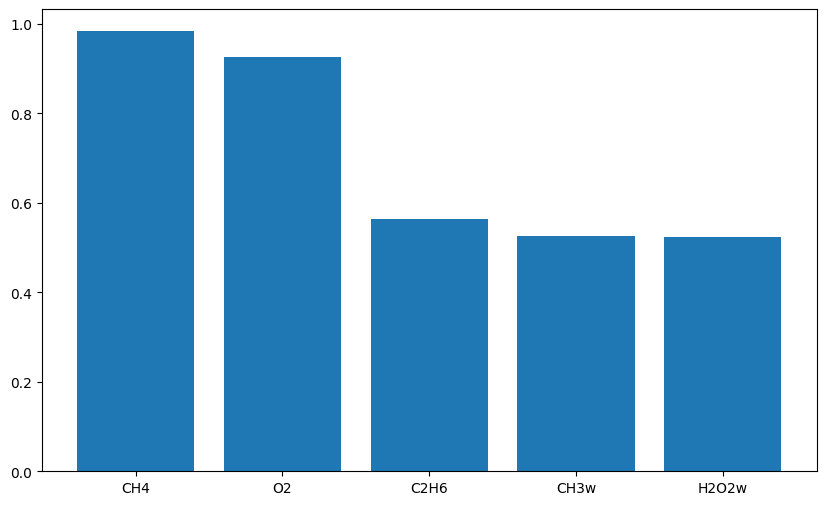

In [18]:
for m in range(reduced_size):
    
    indexes=spearman_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [19]:
n_samples=np.shape(latent_space)[0]

corr_dataset_=corr_dataset.iloc[1:,:]

latent_space_=latent_space[0:n_samples-1,:]

In [20]:
print(np.shape(corr_dataset_))
print(np.shape(latent_space_))

(119998, 61)
(119998, 3)


In [21]:
iterations=np.shape(corr_dataset_)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes_=np.zeros(iterations) #rows, columns
    corr_indexes_=np.array([corr_indexes_])
    
    for j in range(iterations):
        corr_indexes_[:,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_)
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)
else: 
    
    corr_indexes_=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes_[k,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_[:,k])
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)

In [22]:
corr_indexes_

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,-0.828593,-0.835484,-0.962324,-0.962323,0.834559,-0.962323,-0.831954,-0.017406,-0.014400,-0.826009,...,0.015109,0.004157,0.006451,0.006558,0.009907,0.127225,-0.059852,0.005123,0.005780,0.007353
1,0.834410,0.840329,0.959136,0.959135,-0.839402,0.959135,0.838997,0.014409,0.010868,0.833065,...,-0.020416,-0.008451,-0.011725,-0.011840,-0.015202,-0.132774,0.054709,-0.010146,-0.011050,-0.012381
2,-0.821915,-0.828820,-0.947690,-0.947689,0.827894,-0.947689,-0.825275,-0.004010,-0.018650,-0.819316,...,0.009952,0.019031,0.019031,0.018112,0.012112,0.136464,-0.067839,0.018796,0.018535,0.021030


CH4      0.962322
O2       0.834559
C2H6     0.306791
HO2w     0.261172
H2O2w    0.257724
Name: 0, dtype: float64
H      0.959136
CO2    0.959135
O      0.959135
OH     0.959135
H2     0.840329
Name: 1, dtype: float64
CH4      0.947688
O2       0.827894
C2H6     0.290750
HO2w     0.253915
H2O2w    0.244390
Name: 2, dtype: float64


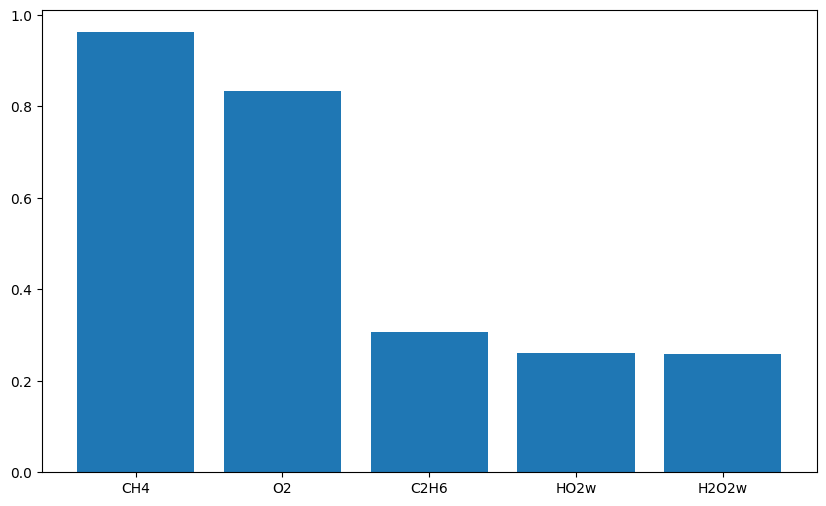

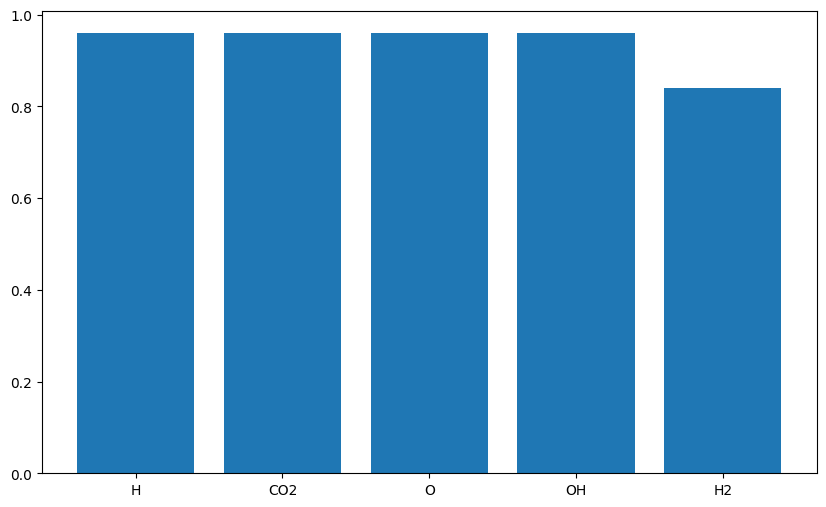

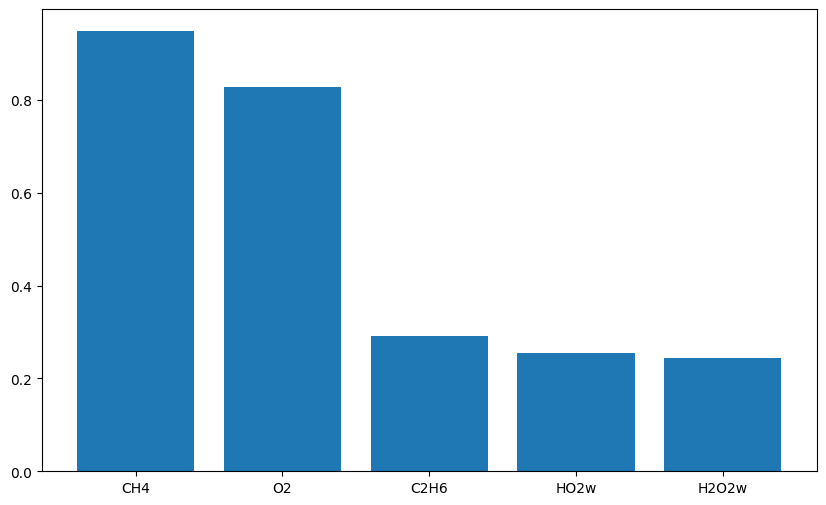

In [23]:
for m in range(reduced_size):
    
    indexes=corr_indexes_.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)